In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import string
import regex as re
from sklearn.pipeline import Pipeline
import nltk

In [2]:
spam_ham_data=pd.read_csv("spam_ham_data.csv")
spam_ham_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Labeling Spam =1 and NotSpam(Ham)=0

In [3]:
spam_ham_data["spam"]=spam_ham_data["Category"].apply(lambda x:1 if x=='spam' else 0)
spam_ham_data.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# Number of Spam and Ham in Data

In [4]:
spam_ham_data.drop(columns="spam").groupby('Category').count()

,Message
Category,
ham,4825
spam,747


# Nltk PorterStemmer for Stemming And Stopwords
- Stemming - Stemming is the process of reducing inflected or derived words to their word stem or root.

In [5]:
ps=nltk.PorterStemmer()
stopwords= nltk.corpus.stopwords.words('english')

In [6]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Preprocessing Data By Removing

- Removing Punctuations i.e ('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~') from every message.

- Tokenization- Tokenizing is splitting some string or sentence into a list of words.

- Stemming the word.

- Removing the stopwords i.e words that do not gives much word to sentences.

In [8]:
def clean_text(text):
    text="".join([word.lower() for word in text if word not in string.punctuation])
    tokens=re.split('\W',text)
    text=[ps.stem(word) for word in tokens if word not in stopwords]
    return text

# Clean data shown below in Message_cleaned column

In [9]:
spam_ham_data["Message_cleaned"]=spam_ham_data["Message"].apply(lambda x:clean_text(x))
spam_ham_data.head()

,Category,Message,spam,Message_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goe, usf, live, around, tho..."


In [10]:
X_train,X_test,y_train,y_test=train_test_split(spam_ham_data.Message,spam_ham_data.spam,test_size=0.2)

# Creating a pipeline for data to be cleaned and trained by model.

- Count Vectorization- This creates a document term-matrix where the entry of each cell will be a count of the number of that word occured in that document.

- Mutinomial Navie Bayes Algorithm

In [11]:
clf=Pipeline([
    ("vectorizer",CountVectorizer(analyzer=clean_text)),
    ("nb",MultinomialNB())
]
)

In [12]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(analyzer=<function clean_text at 0x00000235815E0AF0>)),
                ('nb', MultinomialNB())])

In [13]:
clf.predict(X_test)

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

# Model Accuarcy

In [14]:
clf.score(X_test,y_test)

0.9820627802690582

# Visualizing Data True Vs Prediction On Test Data

Text(0.5, 1.0, '0: Ham 1: Spam')

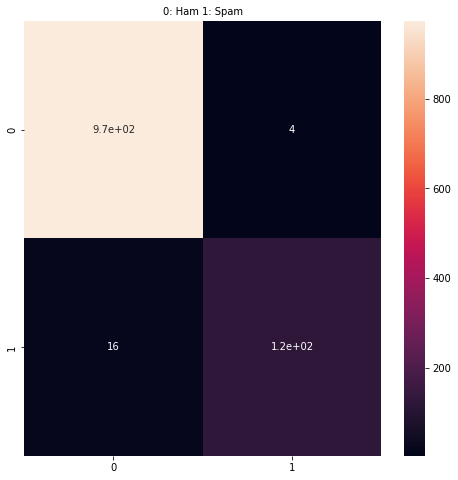

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)),annot=True)
plt.title("0: Ham 1: Spam",fontdict={"size":10})

# Testing Model

In [16]:
import numpy as np
Test_data=spam_ham_data.iloc[449:465,0:2]
Test_data["True label"]=Test_data["Category"].copy()
Test_data.drop(columns=["Category"],inplace=True)
Test_data

,Message,True label
449,LOL ... Have you made plans for new years?,ham
450,10 min later k...,ham
451,hanks lotsly!,ham
452,Thanks for this hope you had a good day today,ham
453,K:)k:)what are detail you want to transfer?acc...,ham
454,Ok i will tell her to stay out. Yeah its been ...,ham
455,"Loan for any purpose £500 - £75,000. Homeowner...",spam
456,Si si. I think ill go make those oreo truffles.,ham
457,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN...",ham
458,I hope you that's the result of being consiste...,ham


In [17]:
def spam_detector(message_data):
    predict=clf.predict(message_data)
    index=np.where(predict==1)[0]
    data=pd.DataFrame([])
    data["Message"]=message_data.loc[message_data.index[(index).tolist()]]
    return data

# Filtered Out Spam From Email Data

In [18]:
spams=spam_detector(Test_data["Message"])
spams

,Message
455,"Loan for any purpose £500 - £75,000. Homeowner..."
463,"UpgrdCentre Orange customer, you may now claim..."


In [21]:
email=[
    'Job Alert!Prepare for your choice of government exam on the Vi App and turn your dream into reality. Click https://bit.ly/3Oz2jYy'
]

In [22]:
predict=clf.predict(email)
predict

array([0], dtype=int64)